In [115]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
#sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Twitter.csv")
df.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df.isnull().sum()

Text_Language           0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

In [175]:
#There are no null values

In [4]:
df.dtypes

Unnamed: 0                int64
Id                       object
Post Contet              object
Sentiment score         float64
Post Length             float64
Hashtag count           float64
Content URL count       float64
Tweet count             float64
Followers count         float64
Listed Count              int64
Media Type               object
Published DateTime       object
Mentions Count          float64
Post author verified    float64
Likes                   float64
Shares                  float64
Comments                float64
Impact                  float64
dtype: object

In [5]:
df.shape

(50000, 18)

In [ ]:
#Removing outliers using IQR method
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
ll = q1 - (1.5* IQR)
ul = q3 + (1.5* IQR)


### Data Preprocessing

#### Since the sentiment score is already available from the post content, I have decided not to use the post content for further analysis. However, the language of the post might be a useful feature for the analysis. Hence using spacy and langid to predict the language from the post content

In [7]:
import spacy
import langid
from nltk.classify.textcat import TextCat

In [8]:
lang = df["Post Contet"].apply(langid.classify)

language = lang.apply(lambda tuple: tuple[0])

In [9]:
df["Text_Language"] = language
df.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Text_Language
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0,en
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0,ja
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0,en
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0,ta
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0,ja


In [10]:
df["Text_Language"].nunique()

92

In [11]:
#There are 92 unique languages

<AxesSubplot:>

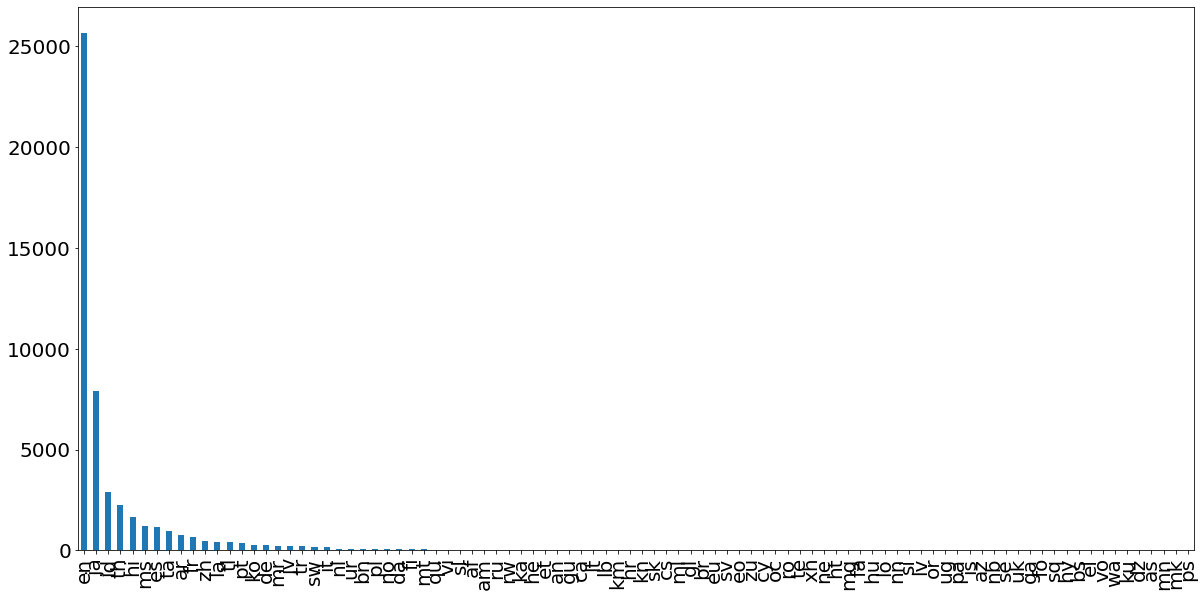

In [12]:
df["Text_Language"].value_counts().plot.bar(figsize=(20,10), fontsize=20)

#### Removing unncessary details from date time like +00:00 i.e last 6 elements which is just stating it is UTC time coordinate and converting the datetime to ordinal values

In [13]:
date_time = df["Published DateTime"].to_list()

In [14]:
new_date_time = []
for i in date_time:
    new_date_time.append(str(i)[0:-6])


In [15]:
df["Published DateTime"] = new_date_time
df.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Text_Language
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24,0.0,0.0,0.0,0.0,0.0,0.0,en
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02,0.0,1.0,10.0,1.0,0.0,110.0,ja
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32,0.0,0.0,0.0,0.0,0.0,0.0,en
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53,0.0,1.0,460.0,219.0,4.0,6830.0,ta
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16,0.0,0.0,0.0,0.0,0.0,0.0,ja


#### Rearranging the columns and removing first two columns which are ids and the post content column

In [16]:
cols = list(df.columns)
cols

['Unnamed: 0',
 'Id',
 'Post Contet',
 'Sentiment score',
 'Post Length',
 'Hashtag count',
 'Content URL count',
 'Tweet count',
 'Followers count',
 'Listed Count',
 'Media Type',
 'Published DateTime',
 'Mentions Count',
 'Post author verified',
 'Likes',
 'Shares',
 'Comments',
 'Impact',
 'Text_Language']

In [17]:
df = df[['Text_Language',
 'Sentiment score',
 'Post Length',
 'Hashtag count',
 'Content URL count',
 'Tweet count',
 'Followers count',
 'Listed Count',
 'Media Type',
 'Published DateTime',
 'Mentions Count',
 'Post author verified',
 'Likes',
 'Shares',
 'Comments',
 'Impact'
 ]]
df.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,en,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24,0.0,0.0,0.0,0.0,0.0,0.0
1,ja,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02,0.0,1.0,10.0,1.0,0.0,110.0
2,en,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32,0.0,0.0,0.0,0.0,0.0,0.0
3,ta,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53,0.0,1.0,460.0,219.0,4.0,6830.0
4,ja,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import time
df['date_conv'] = pd.to_datetime(df["Published DateTime"])
df.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,date_conv
0,en,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-28 12:17:24
1,ja,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02,0.0,1.0,10.0,1.0,0.0,110.0,2021-02-24 06:51:02
2,en,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-15 01:16:32
3,ta,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53,0.0,1.0,460.0,219.0,4.0,6830.0,2021-02-14 03:53:53
4,ja,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-04 13:06:16


In [19]:
df.dtypes

Text_Language                   object
Sentiment score                float64
Post Length                    float64
Hashtag count                  float64
Content URL count              float64
Tweet count                    float64
Followers count                float64
Listed Count                     int64
Media Type                      object
Published DateTime              object
Mentions Count                 float64
Post author verified           float64
Likes                          float64
Shares                         float64
Comments                       float64
Impact                         float64
date_conv               datetime64[ns]
dtype: object

In [20]:
df["Published DateTime"] = df['date_conv'].apply(lambda x: x.toordinal())

In [21]:
df.drop("date_conv", axis=1, inplace=True)

In [22]:
df.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,en,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,737818,0.0,0.0,0.0,0.0,0.0,0.0
1,ja,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,737845,0.0,1.0,10.0,1.0,0.0,110.0
2,en,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,737683,0.0,0.0,0.0,0.0,0.0,0.0
3,ta,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,737835,0.0,1.0,460.0,219.0,4.0,6830.0
4,ja,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,737610,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.isnull().sum()

Text_Language           0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

In [24]:
df.describe()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000
mean,1.068916,154.692360,0.687520,0.480260,2.414257e+05,4.648759e+06,10069.683200,737705.285400,0.113720,0.626480,3020.7063,966.773260,16.407920,40038.735600
std,10.436746,79.099411,1.346979,0.526019,1.607467e+06,1.254513e+07,28384.958681,110.559426,0.512984,0.483743,8261.9454,3117.212706,543.669304,103075.779094
min,-20.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,737515.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,0.000000,0.000000,1.123775e+04,1.053900e+04,2.000000,737613.000000,0.000000,0.000000,1.0000,0.000000,0.000000,10.000000
50%,0.000000,142.000000,0.000000,0.000000,5.273800e+04,3.551225e+05,555.500000,737699.000000,0.000000,1.000000,153.0000,42.000000,0.000000,2100.000000
75%,0.000000,215.000000,1.000000,1.000000,2.595015e+05,2.809978e+06,6171.000000,737803.000000,0.000000,1.000000,1909.0000,559.000000,0.000000,27500.000000
max,20.000000,373.000000,21.000000,7.000000,5.044408e+07,1.144406e+08,568139.000000,737940.000000,12.000000,1.000000,90919.0000,79671.000000,66939.000000,997980.000000


In [26]:
#Since high tweet and follower count can be a good factor to analyze the impact, the outlier points will not be removed
#Scaling them would be beneficial

In [27]:
#Using Label Encoder to convert Text Language variables to numerical values
le = LabelEncoder()
df["Text_Language"] = le.fit_transform(df["Text_Language"])
df.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,16,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,737818,0.0,0.0,0.0,0.0,0.0,0.0
1,37,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,737845,0.0,1.0,10.0,1.0,0.0,110.0
2,16,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,737683,0.0,0.0,0.0,0.0,0.0,0.0
3,78,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,737835,0.0,1.0,460.0,219.0,4.0,6830.0
4,37,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,737610,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df["Media Type"].value_counts()

TEXT     30176
IMAGE    17426
VIDEO     2398
Name: Media Type, dtype: int64

In [29]:
#There are three unique media type values, Instead of lableencoding, we can perform one hot encoding

In [30]:
df_categorical = df.select_dtypes(include = "object")
df_cat = pd.get_dummies(data = df_categorical, columns=df_categorical.columns, drop_first = True)
df_cat

,Media Type_TEXT,Media Type_VIDEO
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
49995,1,0
49996,1,0
49997,1,0
49998,0,0


In [191]:
df_num = pd.concat([df, df_cat], axis=1)
df_num.drop("Media Type", axis=1, inplace=True)

KeyError: "['Media Type'] not found in axis"

In [177]:
df_num.shape

(50000, 17)

In [109]:
#creating csv file to work on tensorflow
df_num.to_csv("Twitter_clean.csv")

In [32]:
df_num.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Media Type_TEXT,Media Type_VIDEO
0,16,0.0,17.0,0.0,0.0,1660.0,133.0,0,737818,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,37,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,737845,0.0,1.0,10.0,1.0,0.0,110.0,1,0
2,16,0.0,78.0,0.0,0.0,39976.0,1560.0,0,737683,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,78,0.0,284.0,2.0,0.0,8045.0,27191.0,26,737835,0.0,1.0,460.0,219.0,4.0,6830.0,1,0
4,37,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,737610,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Outlier Treatment

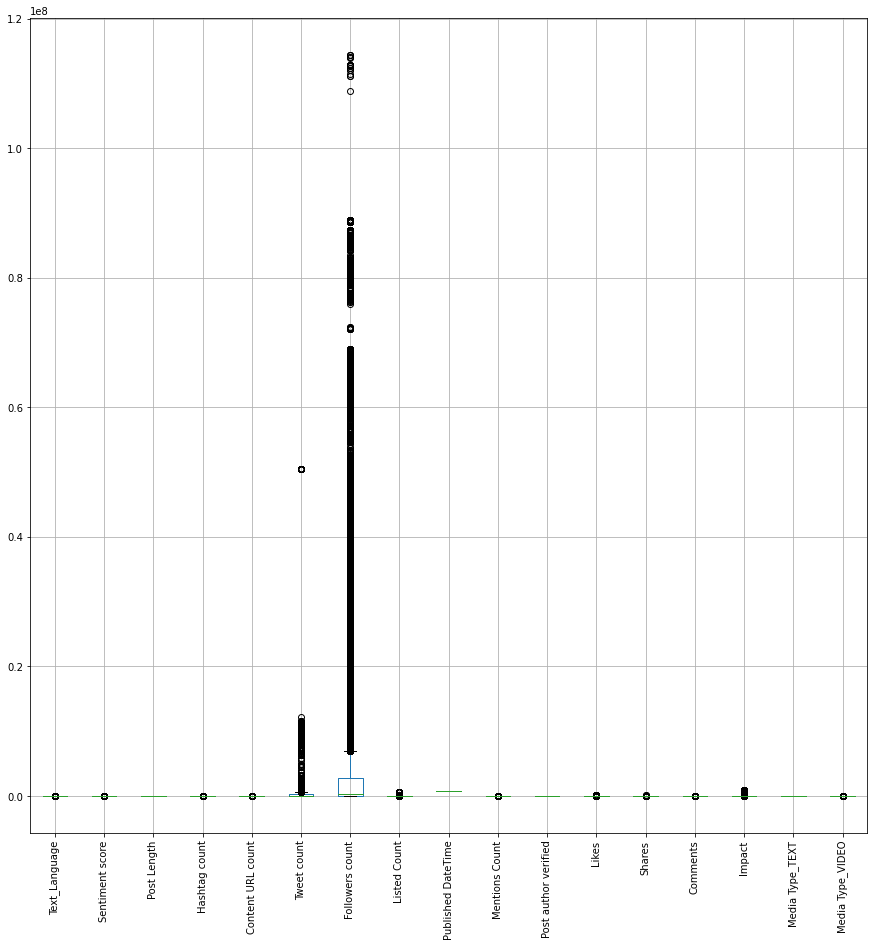

In [187]:
plt.rcParams['figure.figsize'] = [15,8]
df_num.boxplot(figsize = (15,15))
plt.xticks(rotation = "vertical")

plt.show()

In [190]:
#Removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
ul = Q3 + (1.5* IQR)
ul

Text_Language                61.000
Sentiment score               0.000
Post Length                 342.000
Hashtag count                 2.500
Content URL count             2.500
Tweet count              553495.750
Followers count         2302471.250
Listed Count               4870.625
Published DateTime       738067.500
Mentions Count                0.000
Post author verified          2.500
Likes                       575.625
Shares                      162.500
Comments                      0.000
Impact                     7575.000
Media Type_TEXT               2.500
Media Type_VIDEO              0.000
dtype: float64

In [ ]:
#The upper limit for some features is very high, removing data above the upper limit will result in losing information.
#Keeping the outliers for modelling

In [33]:
#Using Standard Scaler on the above dataframe
X = df_num.drop("Impact", axis=1)

Y = df_num["Impact"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size = 0.30)


<AxesSubplot:>

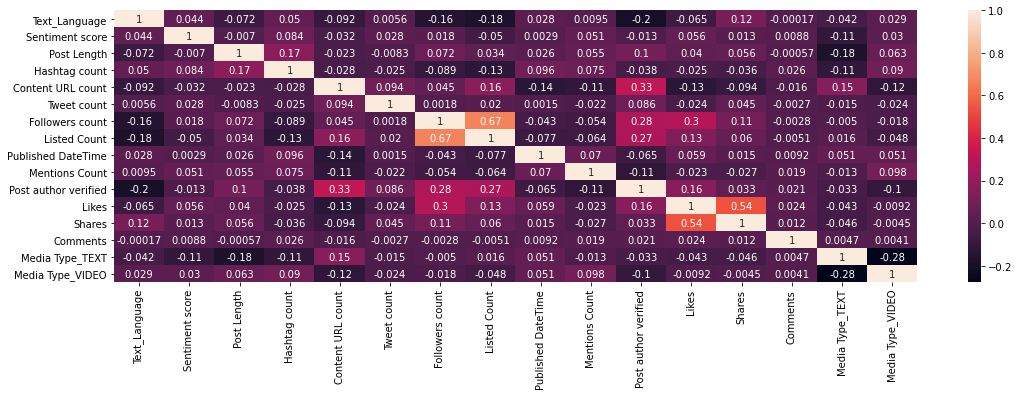

In [176]:
#Checking for multi collinearity
plt.figure(figsize = (18,5))
sns.heatmap(X.corr(), annot = True)

In [ ]:
#There is no multi collinearity in the dataset

In [34]:
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("X_test:", x_test.shape)
print("Y_test:", x_test.shape)

X_train: (35000, 16)
Y_train: (35000,)
X_test: (15000, 16)
Y_test: (15000, 16)


In [35]:
df_num.describe()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Media Type_TEXT,Media Type_VIDEO
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,29.496540,1.068916,154.692360,0.687520,0.480260,2.414257e+05,4.648759e+06,10069.683200,737705.285400,0.113720,0.626480,3020.7063,966.773260,16.407920,40038.735600,0.603520,0.047960
std,20.430325,10.436746,79.099411,1.346979,0.526019,1.607467e+06,1.254513e+07,28384.958681,110.559426,0.512984,0.483743,8261.9454,3117.212706,543.669304,103075.779094,0.489171,0.213684
min,0.000000,-20.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,737515.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,94.000000,0.000000,0.000000,1.123775e+04,1.053900e+04,2.000000,737613.000000,0.000000,0.000000,1.0000,0.000000,0.000000,10.000000,0.000000,0.000000
50%,16.000000,0.000000,142.000000,0.000000,0.000000,5.273800e+04,3.551225e+05,555.500000,737699.000000,0.000000,1.000000,153.0000,42.000000,0.000000,2100.000000,1.000000,0.000000
75%,37.000000,0.000000,215.000000,1.000000,1.000000,2.595015e+05,2.809978e+06,6171.000000,737803.000000,0.000000,1.000000,1909.0000,559.000000,0.000000,27500.000000,1.000000,0.000000
max,91.000000,20.000000,373.000000,21.000000,7.000000,5.044408e+07,1.144406e+08,568139.000000,737940.000000,12.000000,1.000000,90919.0000,79671.000000,66939.000000,997980.000000,1.000000,1.000000


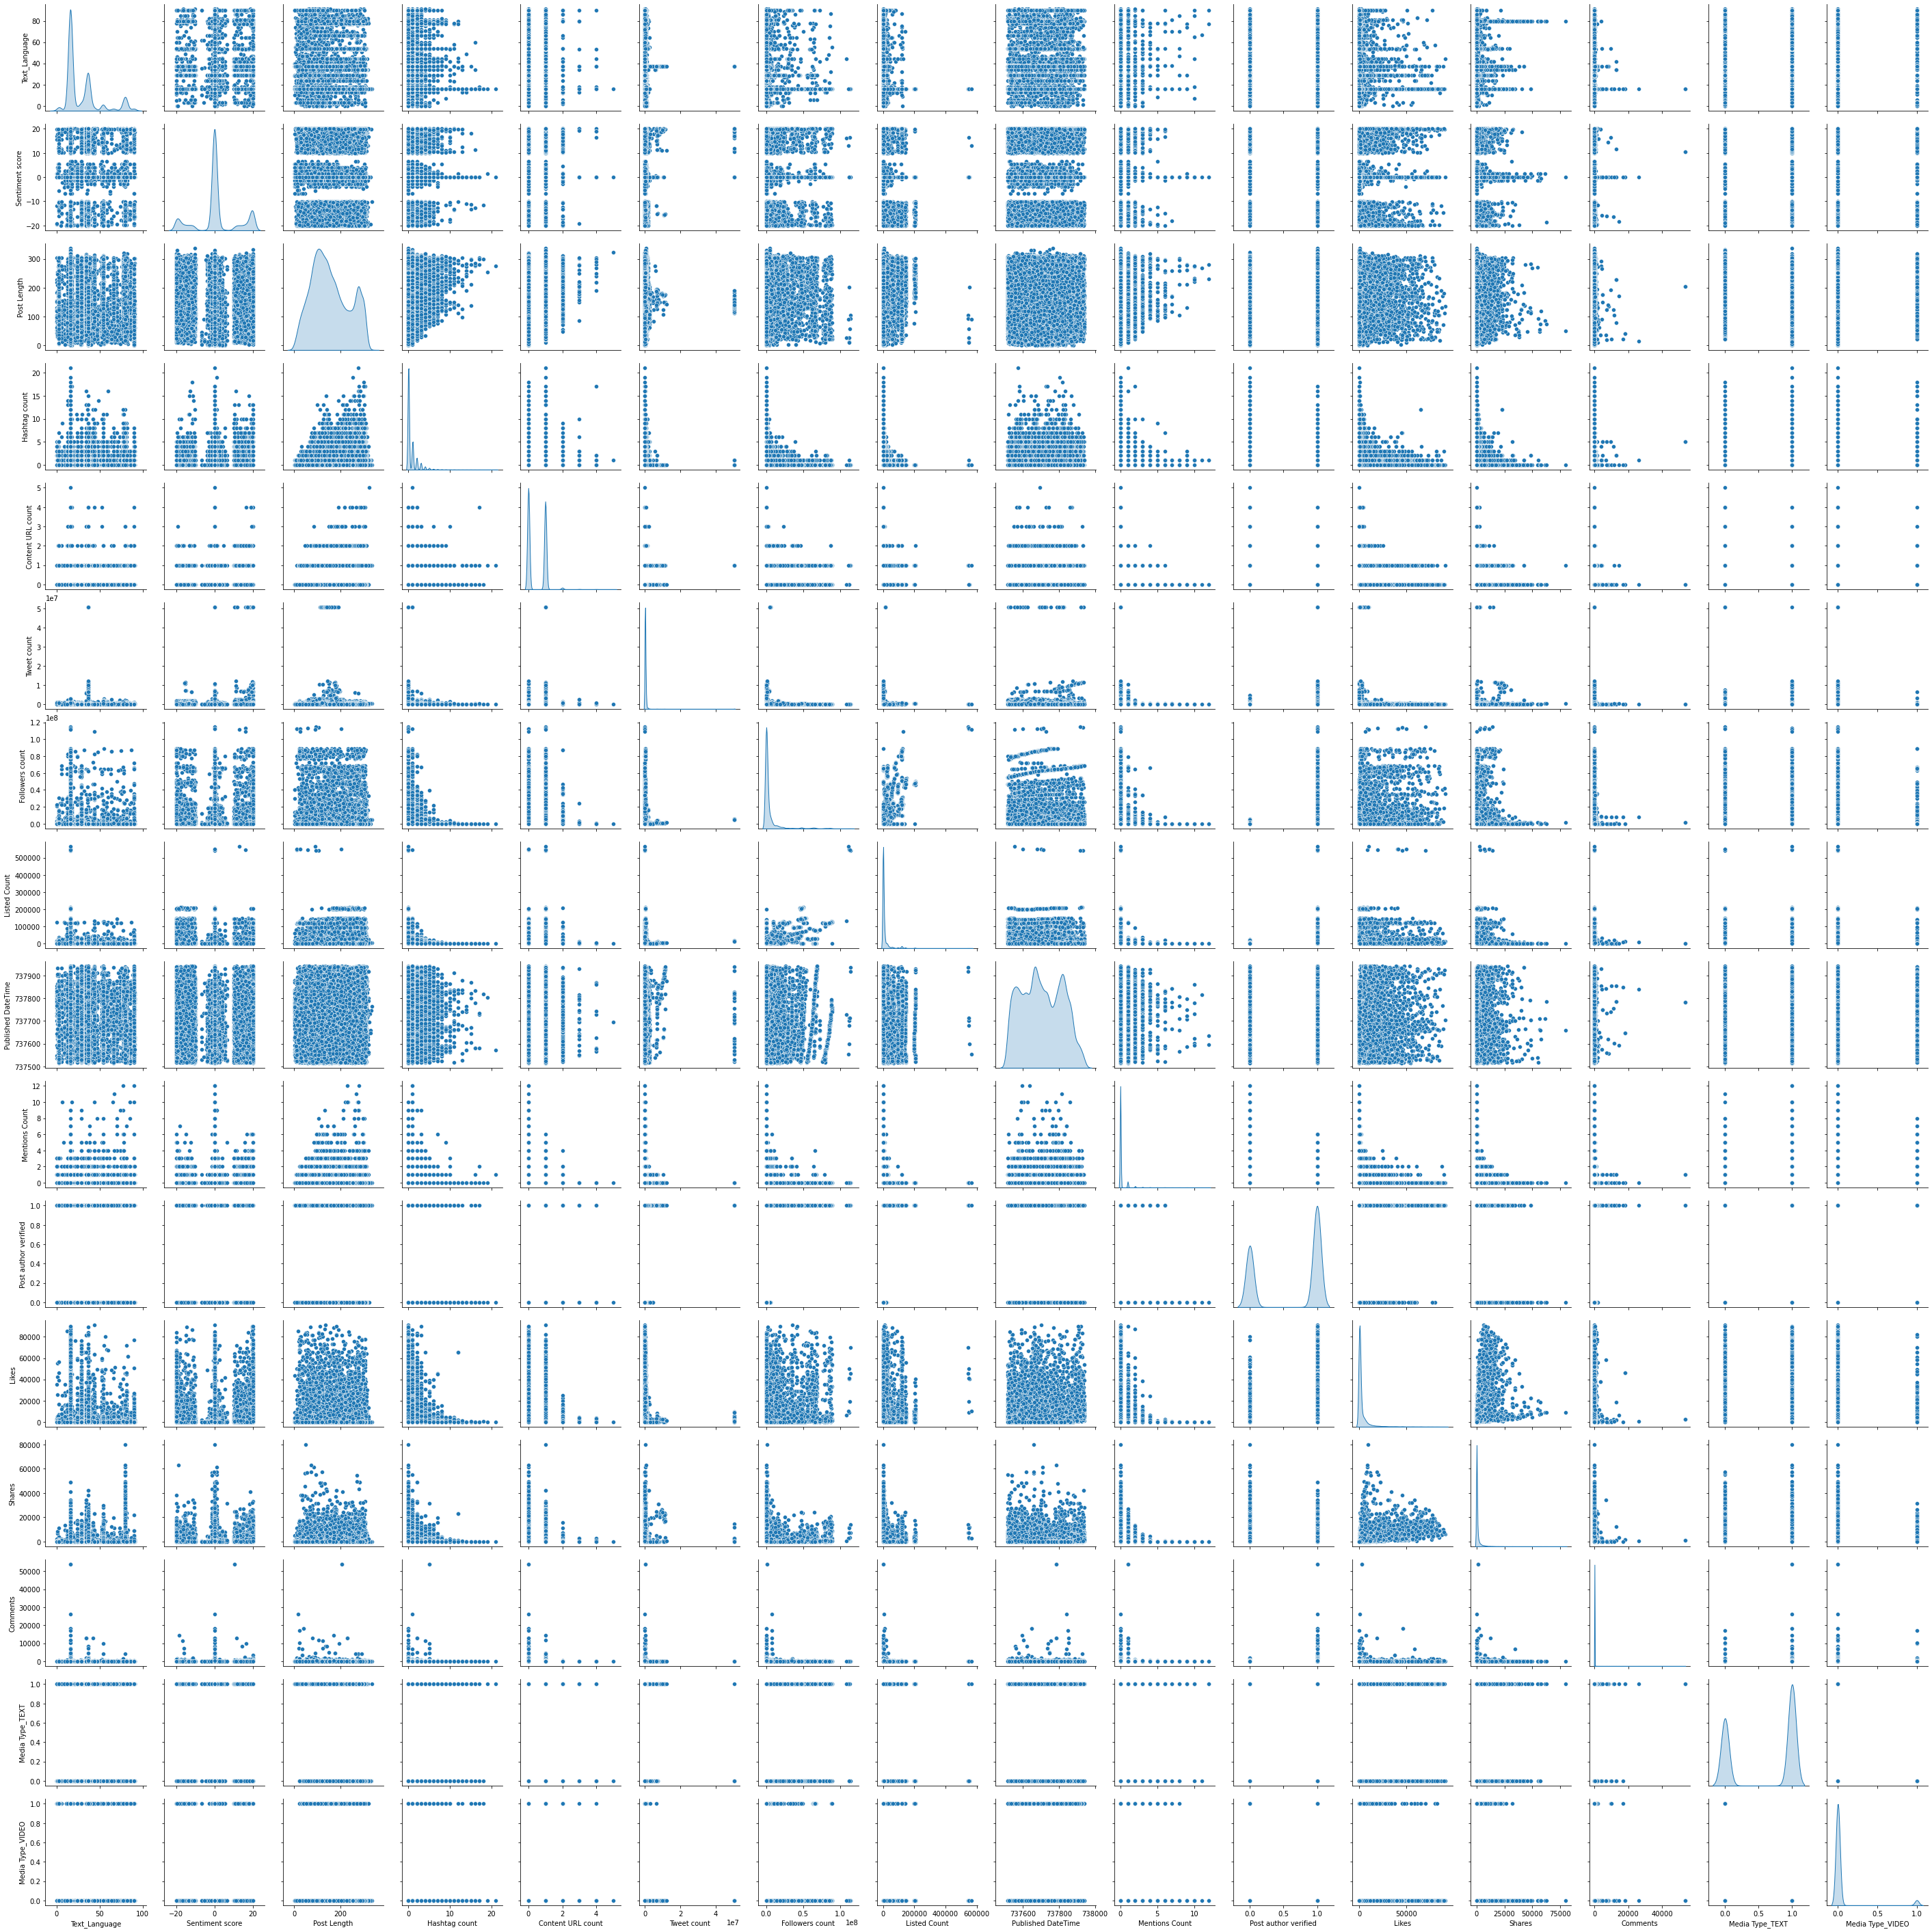

In [36]:
sns.pairplot(x_train, diag_kind='kde')
plt.show()

In [37]:
#Scaling the numerical features since the range of the values is very high-- using StandardScaler

In [38]:
x_test.isnull().sum()

Text_Language           0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Media Type_TEXT         0
Media Type_VIDEO        0
dtype: int64

In [39]:
ss=StandardScaler()
ss.fit(x_train)

X_train_scaled = ss.transform(x_train)
X_test_scaled = ss.transform(x_test)



In [40]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = ss.fit_transform(y_train)
y_test_scaled = ss.transform(y_test)

### Building statistical linear regression model using Ordinary Least Sqaures

In [110]:
X = df_num.drop("Impact", axis=1)
Xc = sm.add_constant(X)
Y = df_num["Impact"]
X_train, X_test, Y_train, Y_test = train_test_split(Xc, Y, random_state=1, test_size = 0.30)

In [178]:
%%time
ols_model = sm.OLS(Y_train, X_train).fit()

y_train_pred_ols = ols_model.predict(X_train)
y_test_pred_ols = ols_model.predict(X_test)



mse_train_ols = mean_squared_error(y_train, y_train_pred_ols)
rmse_train_ols = np.sqrt(mse_train_ols)
mae_train_ols = mean_absolute_error(y_train, y_train_pred_ols)
print('Mean squared error for train data from Decision Tree Regressor: ', mse_train_ols)
print('Root Mean squared error for train data from Decision Tree Regressor: ', rmse_train_ols)
print('Mean absolute error for train data from Decision Tree Regressor: ', mae_train_ols)

mse_test_ols = mean_squared_error(y_test, y_test_pred_ols)
rmse_test_ols = np.sqrt(mse_test_ols)
mae_test_ols = mean_absolute_error(y_test, y_test_pred_ols)
print('Mean squared error for test data from Decision Tree Regressor: ', mse_test_ols)
print('Root Mean squared error for test data from Decision Tree Regressor: ', rmse_test_ols)
print('Mean absolute error for test data from Decision Tree Regressor: ', mae_test_ols)

Mean squared error for train data from Decision Tree Regressor:  67.18788496839676
Root Mean squared error for train data from Decision Tree Regressor:  8.196821638195916
Mean absolute error for train data from Decision Tree Regressor:  0.47765266242334226
Mean squared error for test data from Decision Tree Regressor:  6.863187081257278
Root Mean squared error for test data from Decision Tree Regressor:  2.6197685167314457
Mean absolute error for test data from Decision Tree Regressor:  0.38695643735736207
Wall time: 43 ms


In [112]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Impact   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.372e+11
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:18:37   Log-Likelihood:            -1.2329e+05
No. Observations:               35000   AIC:                         2.466e+05
Df Residuals:                   34983   BIC:                         2.468e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1768.1102    299.560     -5.902      0.000   -2355.257   -1180.963
Text_Language            0.0031      0.002      1.379      0.168      -0.001       0.008
Sentiment score          0.0015      0.004      0.342      0.733      -0.007       0.010
Post Length              0.0008      0.001      1.308      0.191      -0.000       0.002
Hashtag count            0.0119      0.034      0.353      0.724      -0.054       0.078
Content URL count       -0.0954      0.094     -1.020      0.308      -0.279       0.088
Tweet count           -4.98e-09   2.73e-08     -0.182      0.855   -5.86e-08    4.86e-08
Followers count      -8.348e-09   4.96e-09     -1.683      0.092   -1.81e-08    1.37e-09
Listed Count          7.085e-06   2.21e-06      3.204      0.001    2.75e-06    1.14e-05
Published DateTime       0.0024      0.000      5.901      0.000       0.002       0.003
Mentions Count           0.0091      0.088      0.103      0.918      -0.164       0.182
Post author verified    -0.2293      0.104     -2.208      0.027      -0.433      -0.026
Likes                   10.0000   6.93e-06   1.44e+06      0.000      10.000      10.000
Shares                  10.0000   1.79e-05    5.6e+05      0.000      10.000      10.000
Comments                10.0000   8.53e-05   1.17e+05      0.000      10.000      10.000
Media Type_TEXT          0.0237      0.097      0.244      0.807      -0.166       0.214
Media Type_VIDEO         0.0290      0.217      0.134      0.893      -0.396       0.454
==============================================================================
Omnibus:                   136940.464   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     176963542285.357
Skew:                         -95.449   Prob(JB):                         0.00
Kurtosis:                   11017.081   Cond. No.                     9.13e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R squared value is 1 for training data, model is over fitting

In [171]:
print("R sqaure value for test:", r2_score(y_test,y_test_pred_ols))

R sqaure value for test: 0.9999999993890781


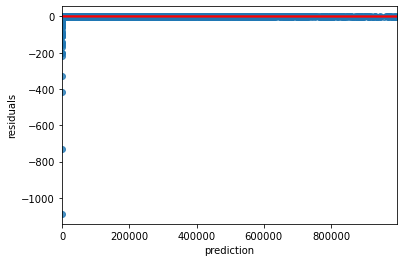

In [180]:
residuals = ols_model.resid
sns.regplot(x = y_train_pred_ols, y = residuals, lowess=True,
            line_kws = {"color":"red"})
plt.xlabel("prediction")
plt.ylabel("residuals")
plt.show()

### Using Linear Regression from sklearn

In [139]:
%%time
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

#Predicting for train and test
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

#MSE, RMSE, MAE for train and test
mse_train_lr = mean_squared_error(y_train_scaled, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train_scaled, y_train_pred_lr)
print('Mean squared error for train data from linear regression: ', mse_train_lr)
print('Root Mean squared error for train data from linear regression: ', rmse_train_lr)
print('Mean absolute error for train data from linear regression: ', mae_train_lr)

mse_test_lr = mean_squared_error(y_test_scaled, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test_scaled, y_test_pred_lr)
print('Mean squared error for test data from linear regression: ', mse_test_lr)
print('Root Mean squared error for test data from linear regression: ', rmse_test_lr)
print('Mean absolute error for test data from linear regression: ', mae_test_lr)

Mean squared error for train data from linear regression:  6.483937088141465e-09
Root Mean squared error for train data from linear regression:  8.052289791196952e-05
Mean absolute error for train data from linear regression:  4.692303705548795e-06
Mean squared error for test data from linear regression:  6.623288302435916e-10
Root Mean squared error for test data from linear regression:  2.5735750042374743e-05
Mean absolute error for test data from linear regression:  3.801333620497261e-06
Wall time: 14 ms


In [140]:
print("R sqaure value for train:", r2_score(y_train_scaled,y_train_pred_lr))
print("R sqaure value for test:", r2_score(y_test_scaled,y_test_pred_lr))

R sqaure value for train: 0.999999993516063
R sqaure value for test: 0.9999999993890781


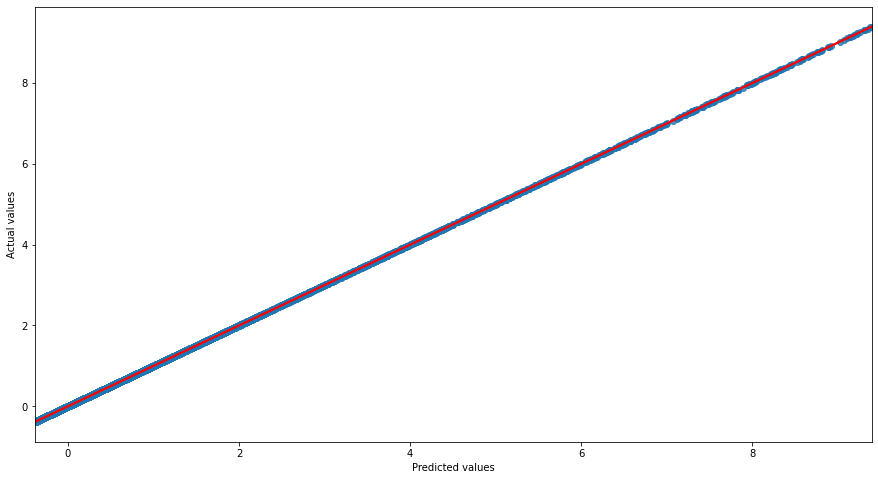

In [194]:
#Plotting actual vs predicted
sns.regplot(x = y_train_pred_lr, y=y_train_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()


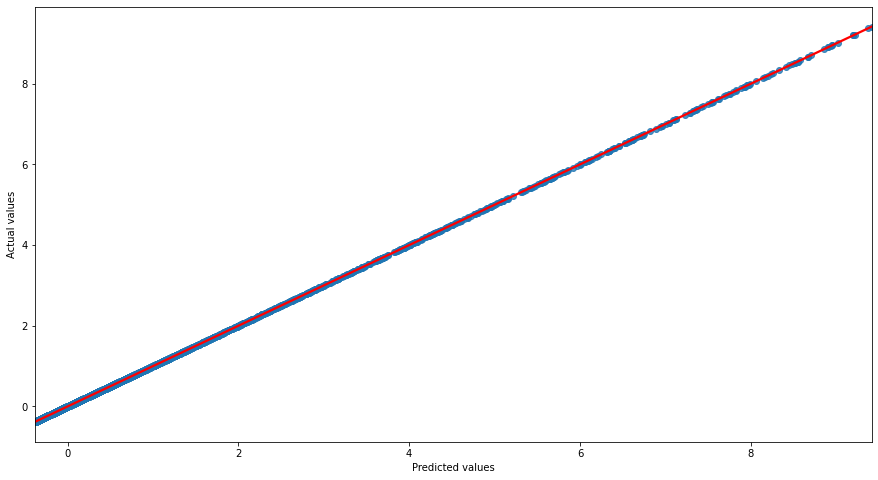

In [195]:
sns.regplot(x = y_test_pred_lr, y=y_test_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

### Decision Tree

In [144]:
%%time
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train_scaled)

#Predicting for train and test
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)



mse_train_dt = mean_squared_error(y_train_scaled, y_train_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
mae_train_dt = mean_absolute_error(y_train_scaled, y_train_pred_dt)
print('Mean squared error for train data from Decision Tree Regressor: ', mse_train_dt)
print('Root Mean squared error for train data from Decision Tree Regressor: ', rmse_train_dt)
print('Mean absolute error for train data from Decision Tree Regressor: ', mae_train_dt)

mse_test_dt = mean_squared_error(y_test_scaled, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
mae_test_dt = mean_absolute_error(y_test_scaled, y_test_pred_dt)
print('Mean squared error for test data from Decision Tree Regressor: ', mse_test_dt)
print('Root Mean squared error for test data from Decision Tree Regressor: ', rmse_test_dt)
print('Mean absolute error for test data from Decision Tree Regressor: ', mae_test_dt)

Mean squared error for train data from Decision Tree Regressor:  2.688364650659285e-28
Root Mean squared error for train data from Decision Tree Regressor:  1.639623325846301e-14
Mean absolute error for train data from Decision Tree Regressor:  7.440295403591892e-15
Mean squared error for test data from Decision Tree Regressor:  0.0028329301435217986
Root Mean squared error for test data from Decision Tree Regressor:  0.053225277298683926
Mean absolute error for test data from Decision Tree Regressor:  0.008463277927392607
Wall time: 409 ms


In [145]:
print("R sqaure value for train:", r2_score(y_train_scaled,y_train_pred_dt))
print("R sqaure value for test:", r2_score(y_test_scaled,y_test_pred_dt))

R sqaure value for train: 1.0
R sqaure value for test: 0.9973869488762225


In [150]:
#Model is overfitting, need to control max depth

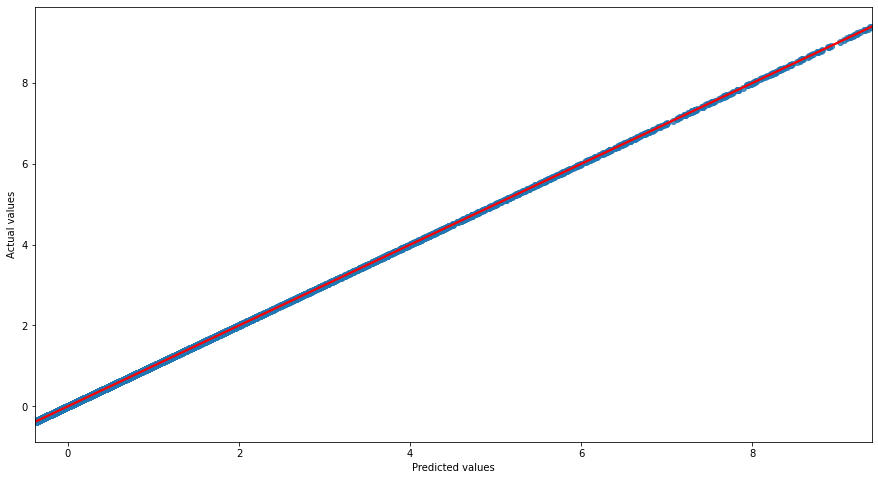

In [196]:
sns.regplot(x = y_train_pred_dt, y=y_train_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

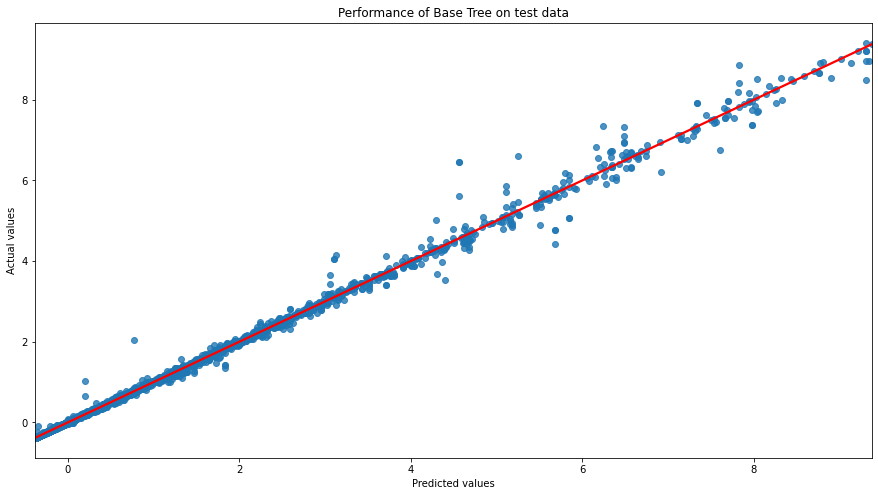

In [205]:
sns.regplot(x = y_test_pred_dt, y=y_test_scaled, lowess = True, line_kws = {"color": "red"})
plt.title("Performance of Base Tree on test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

### Pruning Decision Tree



### Hyperparameters for tuning

min_samples_split = [1,2,4,5]
min_samples_leaf= [1,2,4,5]
max_depth = [2,4,6,8,10,12,14]



In [146]:
dt_prune = DecisionTreeRegressor(random_state=4)
tuned_params = {
                 "min_samples_split":[1,2,4,5],
                 "min_samples_leaf":[1,2,4,5],
                 "max_depth":[2,4,6,8,10,12,14]}
tree_grid = GridSearchCV(estimator = dt_prune, 
                         param_grid = tuned_params, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train_scaled, y_train_scaled)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 4} 



In [181]:
%%time
#Using above hyper parameters from gridsearch to build DT
dt_best = DecisionTreeRegressor(random_state=4, max_depth= 12,
                                min_samples_leaf= 1, min_samples_split=4 )
dt_best.fit(X_train_scaled, y_train_scaled)

#Predicting for train and test
y_train_pred_dt1 = dt_best.predict(X_train_scaled)
y_test_pred_dt1 = dt_best.predict(X_test_scaled)



mse_train_dt1 = mean_squared_error(y_train_scaled, y_train_pred_dt1)
rmse_train_dt1 = np.sqrt(mse_train_dt1)
mae_train_dt1 = mean_absolute_error(y_train_scaled, y_train_pred_dt1)
print('Mean squared error for train data from Decision Tree Regressor: ', mse_train_dt1)
print('Root Mean squared error for train data from Decision Tree Regressor: ', rmse_train_dt1)
print('Mean absolute error for train data from Decision Tree Regressor: ', mae_train_dt1)

mse_test_dt1 = mean_squared_error(y_test_scaled, y_test_pred_dt1)
rmse_test_dt1 = np.sqrt(mse_test_dt1)
mae_test_dt1 = mean_absolute_error(y_test_scaled, y_test_pred_dt1)
print('Mean squared error for test data from Decision Tree Regressor: ', mse_test_dt1)
print('Root Mean squared error for test data from Decision Tree Regressor: ', rmse_test_dt1)
print('Mean absolute error for test data from Decision Tree Regressor: ', mae_test_dt1)

Mean squared error for train data from Decision Tree Regressor:  0.00014129771822155336
Root Mean squared error for train data from Decision Tree Regressor:  0.011886871675152944
Mean absolute error for train data from Decision Tree Regressor:  0.0052695847779865345
Mean squared error for test data from Decision Tree Regressor:  0.0023825751475767256
Root Mean squared error for test data from Decision Tree Regressor:  0.048811629224773126
Mean absolute error for test data from Decision Tree Regressor:  0.011219604327008517
Wall time: 252 ms


In [148]:
print("R sqaure value for train:", r2_score(y_train_scaled,y_train_pred_dt1))
print("R sqaure value for test:", r2_score(y_test_scaled,y_test_pred_dt1))

R sqaure value for train: 0.9998587022817784
R sqaure value for test: 0.997802349386872


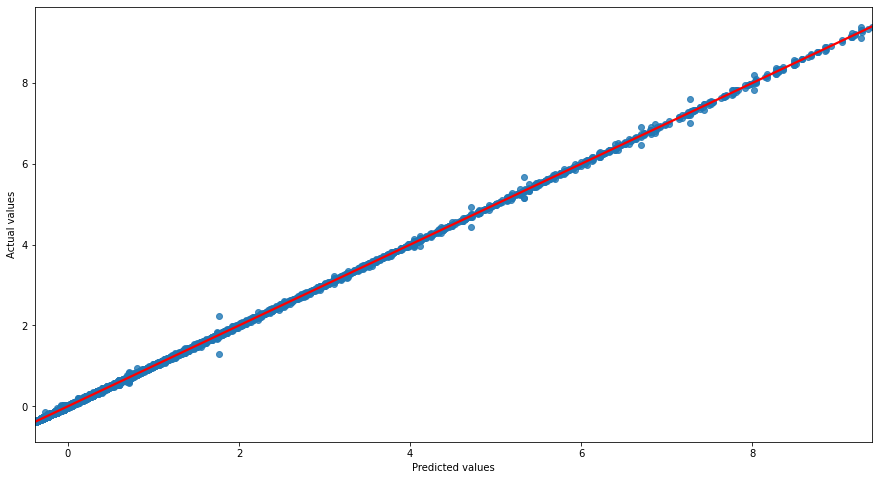

In [198]:
sns.regplot(x = y_train_pred_dt1, y=y_train_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

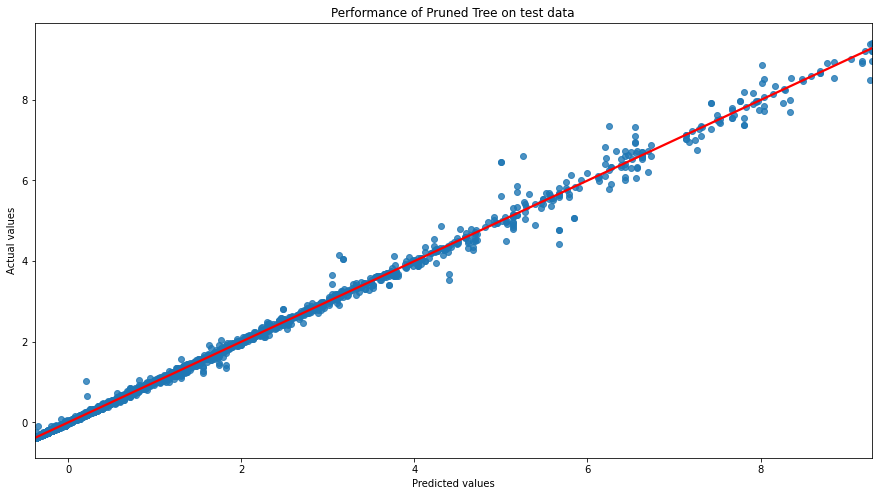

In [204]:
sns.regplot(x = y_test_pred_dt1, y=y_test_scaled, lowess = True, line_kws = {"color": "red"})
plt.title("Performance of Pruned Tree on test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

### Bootsrapping Decision Tree using Random Forest Regressor

In [182]:
%%time
rf = RandomForestRegressor(max_depth= 12,
                                min_samples_leaf= 1, min_samples_split=4, random_state=30)
rf.fit(X_train_scaled, y_train_scaled)

#Predicting for train and test
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)



mse_train_rf = mean_squared_error(y_train_scaled, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train_scaled, y_train_pred_rf)
print('Mean squared error for train data from Random Forest Regressor: ', mse_train_rf)
print('Root Mean squared error for train data from Random Forest Regressor: ', rmse_train_rf)
print('Mean absolute error for train data from Random Forest Regressor: ', mae_train_rf)

mse_test_rf = mean_squared_error(y_test_scaled, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test_scaled, y_test_pred_rf)
print('Mean squared error for test data from Random Forest Regressor: ', mse_test_rf)
print('Root Mean squared error for test data from Random Forest Regressor: ', rmse_test_rf)
print('Mean absolute error for test data from Random Forest Regressor: ', mae_test_rf)

Mean squared error for train data from Random Forest Regressor:  0.00022488061219489797
Root Mean squared error for train data from Random Forest Regressor:  0.014996019878451014
Mean absolute error for train data from Random Forest Regressor:  0.0031791835910432013
Mean squared error for test data from Random Forest Regressor:  0.0013679514657037534
Root Mean squared error for test data from Random Forest Regressor:  0.0369858279034518
Mean absolute error for test data from Random Forest Regressor:  0.005680626136428766
Wall time: 15 s


In [183]:
print("R sqaure value for train:", r2_score(y_train_scaled,y_train_pred_rf))
print("R sqaure value for test:", r2_score(y_test_scaled,y_test_pred_rf))

R sqaure value for train: 0.9997751193878051
R sqaure value for test: 0.998738222640998


In [163]:
feature_list = list(X.columns)
feature_imp = pd.Series(rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Likes                   0.932179
Shares                  0.064773
Comments                0.002286
Tweet count             0.000144
Post Length             0.000127
Listed Count            0.000123
Published DateTime      0.000116
Followers count         0.000085
Content URL count       0.000046
Sentiment score         0.000046
Text_Language           0.000029
Hashtag count           0.000018
Media Type_TEXT         0.000014
Post author verified    0.000009
Media Type_VIDEO        0.000004
Mentions Count          0.000002
dtype: float64


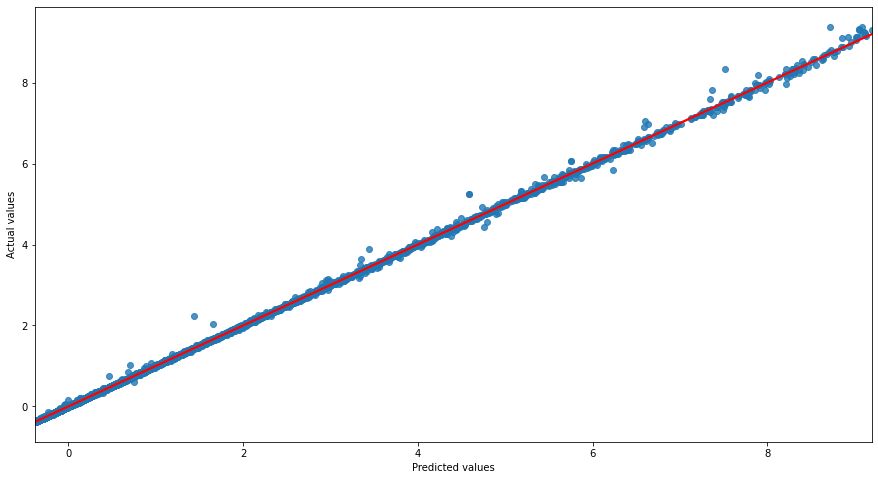

In [200]:
sns.regplot(x = y_train_pred_rf, y=y_train_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

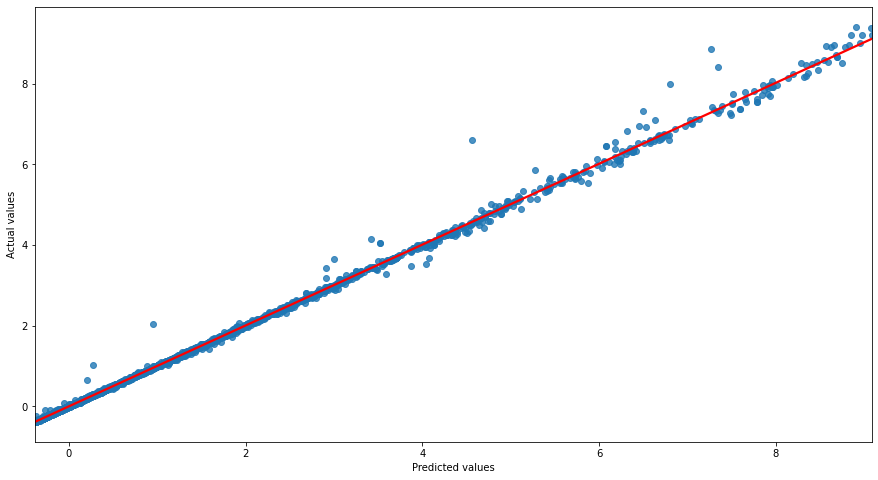

In [201]:
sns.regplot(x = y_test_pred_rf, y=y_test_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

## validation metrics

### Training Data

In [208]:
Stats_model_OLS = [67.187, 8.196, 0.4776, 1.0]
Linear_Regression = [6.483937088141465e-09, 8.052289791196952e-05, 4.692303705548795e-06, 0.999999993516063 ]
Decision_Tree_Base = [2.688364650659285e-28, 1.639623325846301e-14, 7.440295403591892e-15, 1.0]
Decision_Tree_Pruned = [0.0001412, 0.01188, 0.005269, 0.99985]
Random_Forest_Regressor = [0.000224, 0.01499, 0.00317, 0.9997]
Neural_Network = [9.417190085514449e-06, 0.003068, 0.001015, 0.999990]




MSE = [Stats_model_OLS[0],Linear_Regression[0],Decision_Tree_Base[0],Decision_Tree_Pruned[0],
            Random_Forest_Regressor[0],Neural_Network[0] ]
RMSE = [Stats_model_OLS[1],Linear_Regression[1],Decision_Tree_Base[1],Decision_Tree_Pruned[1],
            Random_Forest_Regressor[1],Neural_Network[1] ]
MAE = [Stats_model_OLS[2],Linear_Regression[2],Decision_Tree_Base[2],Decision_Tree_Pruned[2],
            Random_Forest_Regressor[2],Neural_Network[2] ]
R_sqaure = [Stats_model_OLS[-1],Linear_Regression[-1],Decision_Tree_Base[-1],Decision_Tree_Pruned[-1],
            Random_Forest_Regressor[-1],Neural_Network[-1] ]

train_metrics = pd.DataFrame({"MSE_train":[Stasts_model_OLS[0],Linear_Regression[0],Decision_Tree_Base[0],Decision_Tree_Pruned[0],
            Random_Forest_Regressor[0],Neural_Network[0] ],
"RMSE_train":[Stasts_model_OLS[1],Linear_Regression[1],Decision_Tree_Base[1],Decision_Tree_Pruned[1],
            Random_Forest_Regressor[1],Neural_Network[1] ],
"MAE_train":[Stasts_model_OLS[2],Linear_Regression[2],Decision_Tree_Base[2],Decision_Tree_Pruned[2],
            Random_Forest_Regressor[2],Neural_Network[2] ],
"R_sqaure_train":[Stasts_model_OLS[-1],Linear_Regression[-1],Decision_Tree_Base[-1],Decision_Tree_Pruned[-1],
            Random_Forest_Regressor[-1],Neural_Network[-1] ]},
                             index=["OLS", "Linear Regression","Decision_Tree_Base","Decision_Tree_Pruned", "Random_Forest", "Neural_Network"])
train_metrics

,MSE_train,RMSE_train,MAE_train,R_sqaure_train
OLS,6.863100e+00,2.619700e+00,3.869000e-01,0.99990
Linear Regression,6.483937e-09,8.052290e-05,4.692304e-06,1.00000
Decision_Tree_Base,2.688365e-28,1.639623e-14,7.440295e-15,1.00000
Decision_Tree_Pruned,1.412000e-04,1.188000e-02,5.269000e-03,0.99985
Random_Forest,2.240000e-04,1.499000e-02,3.170000e-03,0.99970
Neural_Network,9.417190e-06,3.068000e-03,1.015000e-03,0.99999


### Test Data

In [207]:
Stats_model_OLS = [6.8631, 2.6197, 0.3869, 0.9999]
Linear_Regression = [6.623288302435916e-10, 2.5735750042374743e-05, 3.801333620497261e-06, 0.9999 ]
Decision_Tree_Base = [0.002832, 0.05322, 0.00846, 0.99738 ]
Decision_Tree_Pruned = [0.002382, 0.04881, 0.01121, 0.997802 ]
Random_Forest_Regressor = [0.001367, 0.03698, 0.00568, 0.9987 ]
Neural_Network = [1.52909542521229e-05, 0.00391, 0.00106, 0.999985]


MSE = [Stats_model_OLS[0],Linear_Regression[0],Decision_Tree_Base[0],Decision_Tree_Pruned[0],
            Random_Forest_Regressor[0],Neural_Network[0] ]
RMSE = [Stats_model_OLS[1],Linear_Regression[1],Decision_Tree_Base[1],Decision_Tree_Pruned[1],
            Random_Forest_Regressor[1],Neural_Network[1] ]
MAE = [Stats_model_OLS[2],Linear_Regression[2],Decision_Tree_Base[2],Decision_Tree_Pruned[2],
            Random_Forest_Regressor[2],Neural_Network[2] ]
R_sqaure = [Stats_model_OLS[-1],Linear_Regression[-1],Decision_Tree_Base[-1],Decision_Tree_Pruned[-1],
            Random_Forest_Regressor[-1],Neural_Network[-1] ]

test_metrics = pd.DataFrame({"MSE_test":[Stasts_model_OLS[0],Linear_Regression[0],Decision_Tree_Base[0],Decision_Tree_Pruned[0],
            Random_Forest_Regressor[0],Neural_Network[0] ],
"RMSE_test":[Stasts_model_OLS[1],Linear_Regression[1],Decision_Tree_Base[1],Decision_Tree_Pruned[1],
            Random_Forest_Regressor[1],Neural_Network[1] ],
"MAE_test":[Stasts_model_OLS[2],Linear_Regression[2],Decision_Tree_Base[2],Decision_Tree_Pruned[2],
            Random_Forest_Regressor[2],Neural_Network[2] ],
"R_sqaure_test":[Stasts_model_OLS[-1],Linear_Regression[-1],Decision_Tree_Base[-1],Decision_Tree_Pruned[-1],
            Random_Forest_Regressor[-1],Neural_Network[-1] ]},
                             index=["OLS", "Linear Regression","Decision_Tree_Base","Decision_Tree_Pruned", "Random_Forest", "Neural_Network"])
test_metrics

,MSE_test,RMSE_test,MAE_test,R_sqaure_test
OLS,6.863100e+00,2.619700,0.386900,0.999900
Linear Regression,6.623288e-10,0.000026,0.000004,0.999900
Decision_Tree_Base,2.832000e-03,0.053220,0.008460,0.997380
Decision_Tree_Pruned,2.382000e-03,0.048810,0.011210,0.997802
Random_Forest,1.367000e-03,0.036980,0.005680,0.998700
Neural_Network,1.529095e-05,0.003910,0.001060,0.999985


In [209]:
df_results = pd.concat([train_metrics, test_metrics], axis=1)
df_results

,MSE_train,RMSE_train,MAE_train,R_sqaure_train,MSE_test,RMSE_test,MAE_test,R_sqaure_test
OLS,6.863100e+00,2.619700e+00,3.869000e-01,0.99990,6.863100e+00,2.619700,0.386900,0.999900
Linear Regression,6.483937e-09,8.052290e-05,4.692304e-06,1.00000,6.623288e-10,0.000026,0.000004,0.999900
Decision_Tree_Base,2.688365e-28,1.639623e-14,7.440295e-15,1.00000,2.832000e-03,0.053220,0.008460,0.997380
Decision_Tree_Pruned,1.412000e-04,1.188000e-02,5.269000e-03,0.99985,2.382000e-03,0.048810,0.011210,0.997802
Random_Forest,2.240000e-04,1.499000e-02,3.170000e-03,0.99970,1.367000e-03,0.036980,0.005680,0.998700
Neural_Network,9.417190e-06,3.068000e-03,1.015000e-03,0.99999,1.529095e-05,0.003910,0.001060,0.999985


In [210]:
cols = df_results.columns
cols

Index(['MSE_train', 'RMSE_train', 'MAE_train', 'R_sqaure_train', 'MSE_test',
       'RMSE_test', 'MAE_test', 'R_sqaure_test'],
      dtype='object')

In [217]:
df_results = df_results[['MSE_train', 'MSE_test', 'RMSE_train','RMSE_test', 'MAE_train',
                         'MAE_test', 'R_sqaure_train', 'R_sqaure_test']]
df_results =df_results.sort_values(by = ["RMSE_train", "RMSE_test"], ascending=True)

In [218]:
df_results.iloc[1:]

,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R_sqaure_train,R_sqaure_test
Linear Regression,6.483937e-09,6.623288e-10,0.000081,0.000026,0.000005,0.000004,1.00000,0.999900
Neural_Network,9.417190e-06,1.529095e-05,0.003068,0.003910,0.001015,0.001060,0.99999,0.999985
Decision_Tree_Pruned,1.412000e-04,2.382000e-03,0.011880,0.048810,0.005269,0.011210,0.99985,0.997802
Random_Forest,2.240000e-04,1.367000e-03,0.014990,0.036980,0.003170,0.005680,0.99970,0.998700
OLS,6.863100e+00,6.863100e+00,2.619700,2.619700,0.386900,0.386900,0.99990,0.999900
